In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Load the inbuilt dataset mnist from keras
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

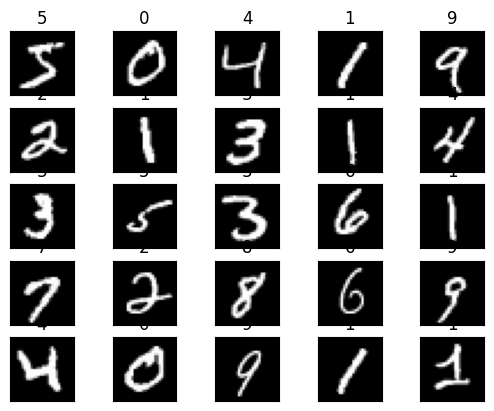

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

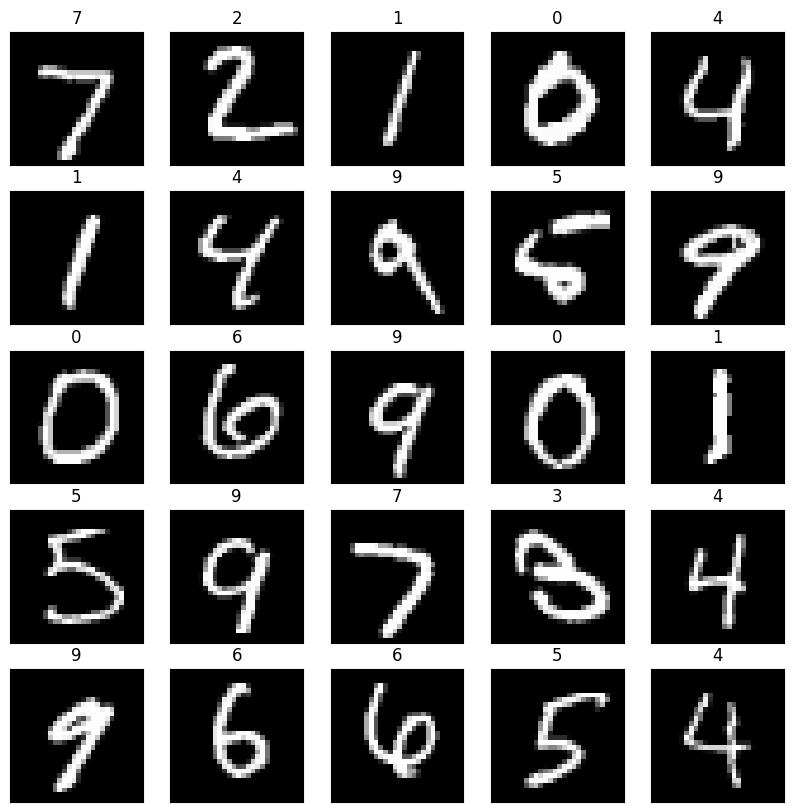

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(y_test[i])
    plt.xticks([])
    plt.yticks([])

In [7]:
# Normalize the data

X_train =X_train /255
X_test = X_test /255

<Axes: xlabel='count'>

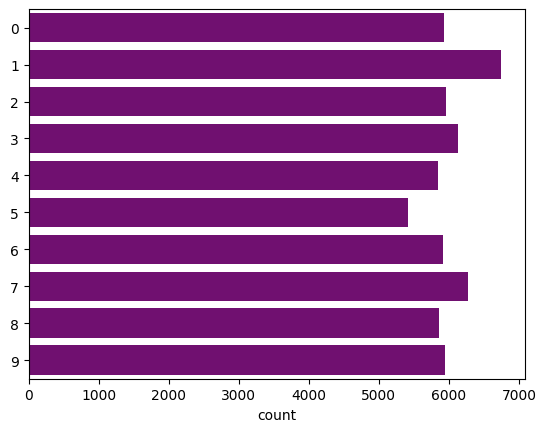

In [8]:
sns.countplot(y = y_train, color="purple")

In [9]:
y_train.shape

(60000,)

In [10]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [11]:
y_train_new.shape

(60000, 10)

In [12]:
y_test_new.shape

(10000, 10)

In [13]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### Build the model

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input Layer
model.add(Input(shape=(28,28,1)))

# Convlution and Pooling Layers
model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16, 
                 kernel_size=(3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, 
                activation='relu'))

# Hidden Layer
model.add(Dense(units=256, 
                activation='relu'))

# Output Layer
model.add(Dense(units=10, 
                activation='softmax'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 175,962 (687.35 KB)

 Trainable params: 175,962 (687.35 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model

In [16]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#### Train the model

In [17]:
history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=32
                    )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9059 - loss: 0.3067
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9852 - loss: 0.0483
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9899 - loss: 0.0333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9916 - loss: 0.0246
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9931 - loss: 0.0212
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9944 - loss: 0.0173
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9957 - loss: 0.0134
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9961 - loss: 0.0121
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9970 - loss: 0.0106
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9971 - loss: 0.0090


In [18]:
print(X_train.shape)
print(y_train_new.shape)


(60000, 28, 28)
(60000, 10)


#### Evaluate the Model

In [19]:
model.evaluate(X_test, 
               y_test, 
               batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.9912 - loss: 0.0322


[0.02793978527188301, 0.9927999973297119]

##### Import the file from https://mitu.co.in/dataset --> iamges folder. Predict the letter present in the image.

In [20]:
import cv2

In [21]:
img =cv2.imread(r'C:\Users\DAI.STUDENTSDC\Desktop\6.NLP\Projects\images\new-char1.jpg', 0)

In [22]:
img_new =cv2.resize(img, (28,28))

In [23]:
new = img_new.reshape(1,28,28)
new = new /255
probs = model.predict(new, verbose=False)
print(probs.argmax())

9


In [24]:
img =cv2.imread(r'C:\Users\DAI.STUDENTSDC\Desktop\6.NLP\Projects\images\new-char1.jpg', 0)

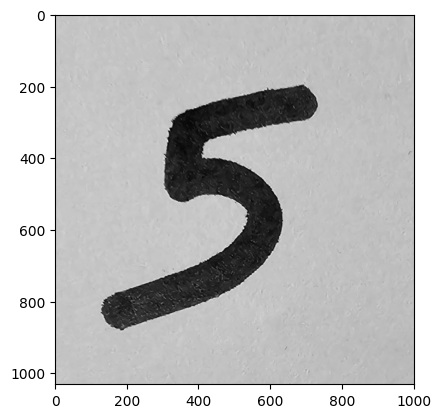

In [25]:
plt.imshow(img, cmap='gray')

#### Predict on the unseen data

In [30]:
(X_te, y_te), (X_tr, y_tr) = mnist.load_data()

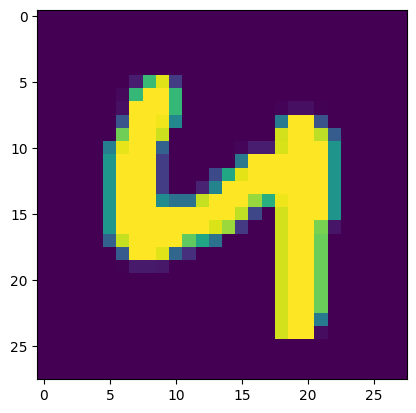

In [32]:
new = X_te[222]  # a random image '1234' is taken for analysis
plt.imshow(new)